É uma classificação não-paramétrica. Também pode ser utilizada em regressão. Utiliza funções de distância para identificar pontos próximas a um dado ou os vizinhos próximos de um dado ponto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)

/tmp/ipykernel_5898/3819035679.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
random_state = 42

## Uso Simples

In [3]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y) 

print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


## Exemplos: 

In [4]:
# No exemplo a seguir, criamos uma classe NeighborsClassifier a partir de uma matriz que representa nosso conjunto de dados e perguntamos 
# qual é o ponto mais próximo de [1,1,1]

samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples) 

print(neigh.kneighbors([[1., 1., 1.]])) 


(array([[0.5]]), array([[2]]))


In [5]:
# Como você pode ver, ele retorna [[0.5]] e [[2]], o que significa que o elemento está a uma distância de 0,5 e é o terceiro 
# elemento de amostras (os índices começam em 0).
# Você também pode consultar vários pontos:

In [6]:
X = [[0., 1., 0.], [1., 0., 1.]]
neigh.kneighbors(X,
                 return_distance=False) 


array([[1],
       [2]])

# Database

In [7]:
# X = [[0, 0], [1, 1]]
# Y = [0, 1]
X, y = make_hastie_10_2()

In [8]:
database_name = ''#'student-mat.csv'
coluna_target = ''#'school'
if database_name:
    base = pd.read_csv(database_name, sep=';')
    X = base.drop(columns=coluna_target)
    y = base[[coluna_target]]

# Dataprep

In [9]:
X_og = X.copy()

# Mantendo apenas Variáveis Independentes Desejadas

In [10]:
accepted_features = [
    # 'age',
    # 'Medu',
    # 'Fedu'
]

if accepted_features:
    X = X[accepted_features]

# Tratando Variáveis Categóricas

In [11]:
try:
    num_features = X_og.describe().columns.tolist()
except:
    pass

In [12]:
try:
    cat_features = X_og.drop(columns=num_features).columns.tolist()
except:
    pass

In [13]:
try:
    # One-hot encoding
    X = pd.get_dummies(X,
                       columns=cat_features,
                       drop_first=True)
except:
    pass

# Tratando Missings e Outliers

In [14]:
#

## Dividir Base de Treino

In [15]:
train_size = 0.8

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    train_size=train_size,
                                                                    random_state=random_state)

# Inicializar Classificador

In [17]:
clf_dict = {
    #'max_depth': 7, # Profundidade Máxima da Árvore
    #'min_samples_split': 2,  # Mínimo para haver split de nó
    #'min_samples_leaf': 1,  # Mínimo para ser nó de decisão
    #'random_state': random_state,
    'n_neighbors': 3,
}

In [18]:
clf = KNeighborsClassifier(**clf_dict)

# Train

In [19]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict

In [20]:
# y_pred = clf.predict([[2., 2.]])
y_pred = clf.predict(X_test)

In [21]:
# y_pred_probs  = clf.predict_proba([[2., 2.]])
y_pred_probs  = clf.predict_proba(X_test)

# Teste

In [22]:
classes = None # ['class 0', 'class 1']

In [23]:
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 0.74


In [25]:
results = classification_report(y_test,
                                y_pred,
                                target_names=classes)

In [26]:
print(results)

              precision    recall  f1-score   support

        -1.0       0.67      0.96      0.79      1210
         1.0       0.92      0.51      0.66      1190

    accuracy                           0.74      2400
   macro avg       0.79      0.73      0.72      2400
weighted avg       0.79      0.74      0.72      2400



# Teste de Validação Cruzada

In [27]:
metricas = {'acc': 'accuracy',
            'recall': 'recall_macro',
            'f1': 'f1_macro',
           }

In [28]:
# Validação de Cruzada de 5 dobras
k = 5  # Número de dobras
cv_scores = model_selection.cross_validate(clf,
                                            X,
                                            y,
                                            scoring=metricas,
                                            cv=k)

In [29]:
cv_scores

{'fit_time': array([0.0112257 , 0.00992465, 0.01127124, 0.01027894, 0.00961852]),
 'score_time': array([0.34790063, 0.37897968, 0.38800478, 0.32800984, 0.33340168]),
 'test_acc': array([0.72041667, 0.72375   , 0.74083333, 0.73333333, 0.73041667]),
 'test_recall': array([0.72140315, 0.72492437, 0.74193522, 0.73446003, 0.73153287]),
 'test_f1': array([0.70425758, 0.70814246, 0.72806762, 0.71955327, 0.71675972])}

In [30]:
mean_test_acc = np.mean(cv_scores['test_acc'])
std_test_acc = np.std(cv_scores['test_acc'])

In [31]:
print(f"Média de cross-validation para acc: {mean_test_acc:.2f}")
print(f"Desvio-padrão de cross-validation para acc: {std_test_acc:.2f}")

Média de cross-validation para acc: 0.73
Desvio-padrão de cross-validation para acc: 0.01


# Matriz de Confusão

In [32]:
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes)
    plt.title('Matriz de Confusão')
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.show()

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

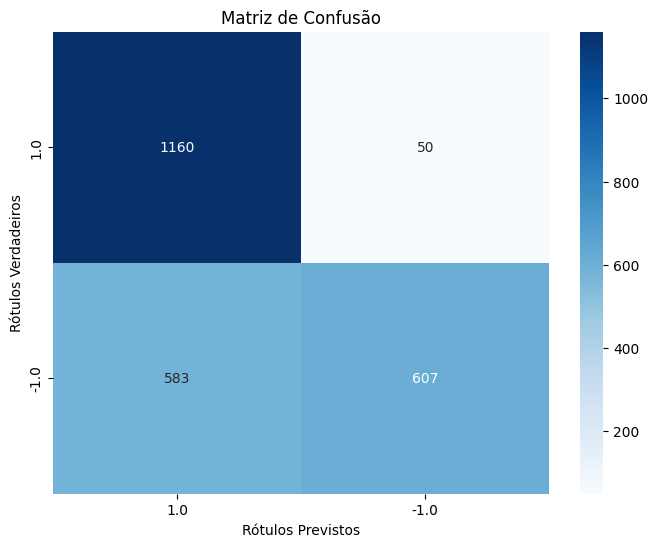

In [34]:
plot_confusion_matrix(conf_matrix, classes=set(y))
